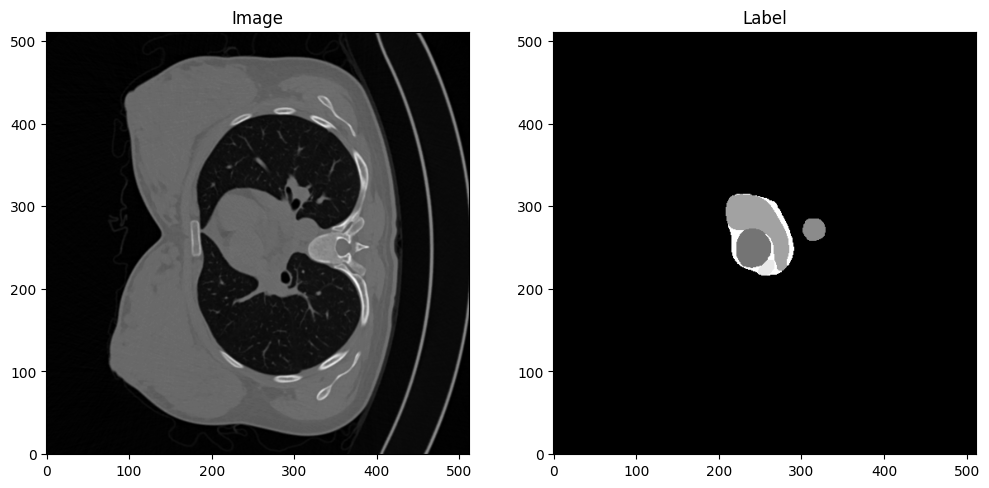

In [16]:
import nibabel as nib
import matplotlib.pyplot as plt

def load_and_display_slice(img_folder, label_folder, file_name, slice_index):
    # 加载图像和标签文件
    img_path = f'{img_folder}/{file_name}'
    label_path = f'{label_folder}/{file_name}'
    
    img = nib.load(img_path).get_fdata()
    label = nib.load(label_path).get_fdata()

    # 显示指定切片
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(img[:, :, slice_index], cmap='gray', origin='lower')
    axes[0].set_title('Image')
    axes[1].imshow(label[:, :, slice_index], cmap='gray', origin='lower')
    axes[1].set_title('Label')

    plt.show()

# 使用函数显示切片
file_name = '6.nii.gz'  # 这里输入文件名
slice_index = img.shape[2] // 2  # 选择要查看的切片索引
load_and_display_slice('./newdata/img', './newdata/lable', file_name, slice_index)


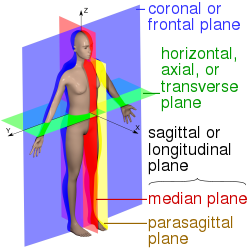

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
import nibabel as nib

# 加载 NIfTI 文件
img = nib.load('./newdata/img/3.nii.gz')  # 替换为您的文件路径
data = img.get_fdata()
lable_img = nib.load('./newdata/lable/3.nii.gz') 
lable_data = lable_img.get_fdata()

# 定义更新切片的函数
def update_slices(slice_x, slice_y, slice_z):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # 原始图像
    axes[0].imshow(data[slice_x, :, :], cmap="gray", origin="lower")
    axes[1].imshow(data[:, slice_y, :], cmap="gray", origin="lower")
    axes[2].imshow(data[:, :, slice_z], cmap="gray", origin="lower")

    # 标记图像（添加颜色和透明度）
    axes[0].imshow(lable_data[slice_x, :, :], cmap="hot", alpha=0.5, origin="lower")
    axes[1].imshow(lable_data[:, slice_y, :], cmap="hot", alpha=0.5, origin="lower")
    axes[2].imshow(lable_data[:, :, slice_z], cmap="hot", alpha=0.5, origin="lower")

    # 设置标题
    axes[0].set_title('Median sagittal section')# 矢状面,就是把人体分成左右两面的解剖面，于这个面平行的也是矢状面。出于这个位置的叫矢状位。矢状位的英文名称是：Median sagittal section；
    axes[1].set_title('Coronal section')# 冠状面，又称额状面。即从左右方向，沿人体的长轴将人体纵切为前、后两部分的切面。这种提法只是为了在临床中将器官位置描述的更具体，英文名称是：Coronal section；
    axes[2].set_title('Transverse section')# 横截面,即左右、前后构成的面为水平位，英文名称是:Transverse section。
    
# 创建三个滑块
slider_x = widgets.IntSlider(min=0, max=data.shape[0]-1, value=data.shape[0]//2, description='X')
slider_y = widgets.IntSlider(min=0, max=data.shape[1]-1, value=data.shape[1]//2, description='Y')
slider_z = widgets.IntSlider(min=0, max=data.shape[2]-1, value=data.shape[2]//2, description='Z')

# 将滑块和更新函数关联起来
ui = widgets.HBox([slider_x, slider_y, slider_z])
out = widgets.interactive_output(update_slices, {'slice_x': slider_x, 'slice_y': slider_y, 'slice_z': slider_z})

# 显示交互式元素
display(ui, out)

Output()